In [113]:
!pip install wordcloud
!pip install nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
import re
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords','punkt','wordnet','omw-1.4','vader_lexicon'])
     

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Applecenter\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Applecenter\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Applecenter\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Applecenter\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Applecenter\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [114]:
netflix_data = pd.read_csv('netflix_titles.csv')

In [24]:
netflix_data ['description'] = netflix_data ['description'].str.lower()

In [26]:
tokenizer = nltk.tokenize.RegexpTokenizer(r"[a-zA-Z0-9']+")

netflix_data['Tokenized_Text'] = netflix_data['description'].apply(lambda x: tokenizer.tokenize(str(x)))
print(netflix_data['Tokenized_Text'].head())

0    [as, her, father, nears, the, end, of, his, li...
1    [after, crossing, paths, at, a, party, a, cape...
2    [to, protect, his, family, from, a, powerful, ...
3    [feuds, flirtations, and, toilet, talk, go, do...
4    [the, arrival, of, a, charismatic, young, prie...
Name: Tokenized_Text, dtype: object


In [27]:
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [28]:
cleaned_tokens_list = []

for text in netflix_data['description']:
    tokenized_document = nltk.word_tokenize(str(text))  # Tokenize each 'Product Description'
    cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]
    cleaned_tokens_list.append(cleaned_tokens)

print(cleaned_tokens_list)

[['father', 'nears', 'end', 'life', ',', 'filmmaker', 'kirsten', 'johnson', 'stages', 'death', 'inventive', 'comical', 'ways', 'help', 'face', 'inevitable', '.'], ['crossing', 'paths', 'party', ',', 'cape', 'town', 'teen', 'sets', 'prove', 'whether', 'private-school', 'swimming', 'star', 'sister', 'abducted', 'birth', '.'], ['protect', 'family', 'powerful', 'drug', 'lord', ',', 'skilled', 'thief', 'mehdi', 'expert', 'team', 'robbers', 'pulled', 'violent', 'deadly', 'turf', 'war', '.'], ['feuds', ',', 'flirtations', 'toilet', 'talk', 'go', 'among', 'incarcerated', 'women', 'orleans', 'justice', 'center', 'new', 'orleans', 'gritty', 'reality', 'series', '.'], ['arrival', 'charismatic', 'young', 'priest', 'brings', 'glorious', 'miracles', ',', 'ominous', 'mysteries', 'renewed', 'religious', 'fervor', 'dying', 'town', 'desperate', 'believe', '.'], ['equestria', "'s", 'divided', '.', 'bright-eyed', 'hero', 'believes', 'earth', 'ponies', ',', 'pegasi', 'unicorns', 'pals', '—', ',', 'hoof', '

In [29]:
print("\n All data labels")
print(netflix_data.groupby("listed_in").count())


 All data labels
                                                    description  \
listed_in                                                         
Action & Adventure                                          128   
Action & Adventure, Anime Features                            1   
Action & Adventure, Anime Features, Children & ...            4   
Action & Adventure, Anime Features, Classic Movies            2   
Action & Adventure, Anime Features, Horror Movies             1   
...                                                         ...   
TV Horror, TV Mysteries, Teen TV Shows                        1   
TV Horror, Teen TV Shows                                      2   
TV Sci-Fi & Fantasy, TV Thrillers                             1   
TV Shows                                                     16   
Thrillers                                                    65   

                                                    Tokenized_Text  
listed_in                                

In [30]:
def preprocess_text(description):
    
             return text.lower()

In [31]:
netflix_data['description'] = netflix_data['description'].apply(preprocess_text)

In [32]:
print(netflix_data.head())

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4                 TV Dramas, TV Horror, TV Mysteries   

                                         description  \
0  a scrappy but poor boy worms his way into a ty...   
1  a scrappy but poor boy worms his way into a ty...   
2  a scrappy but poor boy worms his way into a ty...   
3  a scrappy but poor boy worms his way into a ty...   
4  a scrappy but poor boy worms his way into a ty...   

                                      Tokenized_Text  
0  [as, her, father, nears, the, end, of, his, li...  
1  [after, crossing, paths, at, a, party, a, cape...  
2  [to, protect, his, family, from, a, powerful, ...  
3  [feuds, flirtations, and, toilet, talk, go, do...  
4  [the, arrival, of, a, charismatic, young, prie..

In [33]:
from sklearn.model_selection import train_test_split
X= netflix_data['listed_in']
y= netflix_data['description']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=99)

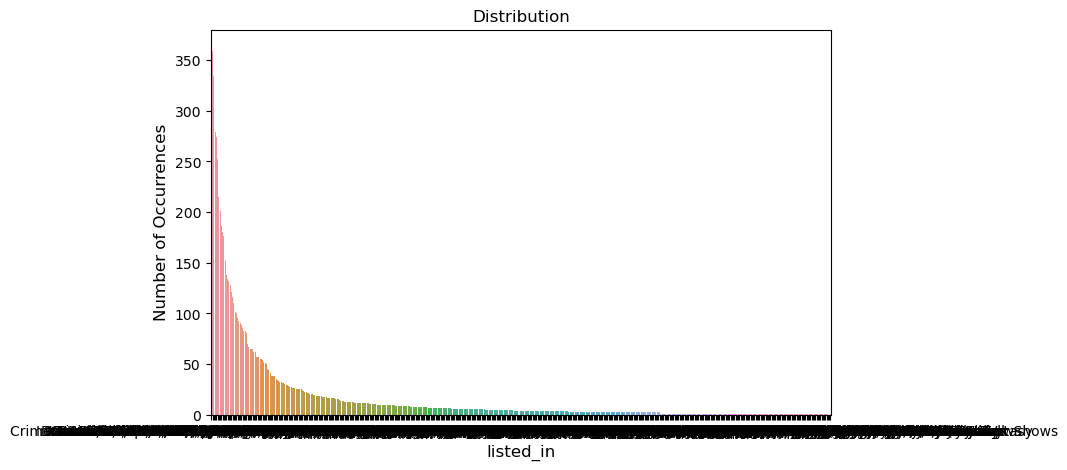

In [34]:
# Checking the balance of the dataset
sentiment_count = netflix_data['listed_in'].value_counts()

# Plotting the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_count.index, y=sentiment_count.values)
plt.title('Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('listed_in', fontsize=12)
plt.show()

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Assuming x contains text data
y = netflix_data['listed_in']
x = netflix_data['description']

# Convert the text data into a list of strings
x = x.astype(str)

# Split the data
X_train, y_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=99)

# Create and fit the TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

# Continue with your modeling code.

In [36]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train_tfidf, y_train)
MultinomialNB()

MultinomialNB()

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Assuming you have text data in X (features) and labels in y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to numerical representation using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize Logistic Regression model
model = LogisticRegression()

# Train the model using the transformed data
model.fit(X_train_tfidf, y_train)

# Predict using the trained model
y_pred = model.predict(X_test_tfidf)

# Calculate accuracy and other metrics
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

# Display confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7589233469865418
Confusion Matrix:
[[25  0  0 ...  0  0  0]
 [ 0  8  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0 14]]

Classification Report:


C:\Users\Applecenter\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Applecenter\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                          precision    recall  f1-score   support

                                                      Action & Adventure       0.86      1.00      0.93        25
                Action & Adventure, Anime Features, International Movies       0.89      1.00      0.94         8
                    Action & Adventure, Anime Features, Sci-Fi & Fantasy       0.00      0.00      0.00         3
            Action & Adventure, Children & Family Movies, Classic Movies       0.00      0.00      0.00         2
          Action & Adventure, Children & Family Movies, Sci-Fi & Fantasy       0.00      0.00      0.00         2
                                      Action & Adventure, Classic Movies       0.00      0.00      0.00         2
                            Action & Adventure, Classic Movies, Comedies       0.00      0.00      0.00         1
                         Action & Adventure, Classic Movies, Cult Movies       0.00    

C:\Users\Applecenter\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Applecenter\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [70]:
from nltk.sentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

print(sentiment.polarity_scores('This move is great!'))
print(sentiment.polarity_scores('THis move is not great'))

{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.6588}
{'neg': 0.452, 'neu': 0.548, 'pos': 0.0, 'compound': -0.5096}


In [72]:

netflix_data.describe()

,listed_in,description,Tokenized_Text
count,8545,8545,8545
unique,498,1,8515
top,"Dramas, International Movies",a scrappy but poor boy worms his way into a ty...,"[paranormal, activity, at, a, lush, abandoned,..."
freq,362,8545,4


<Axes: xlabel='listed_in', ylabel='Count'>

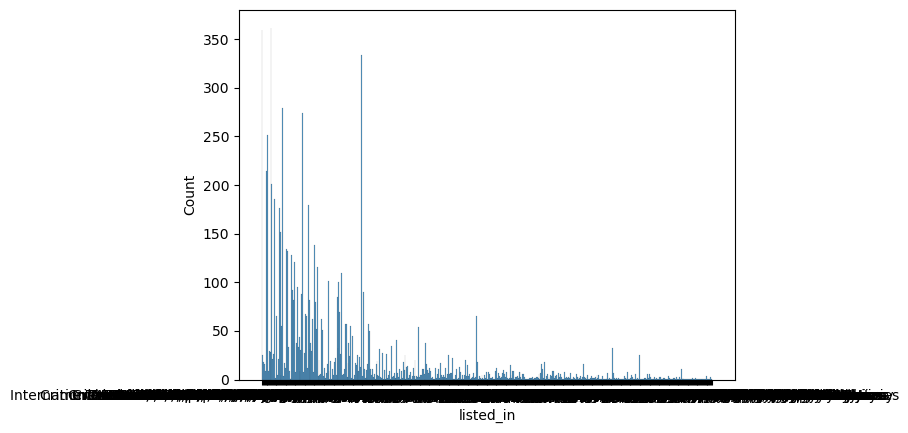

In [77]:
sns.histplot(netflix_data['listed_in'])

In [79]:
netflix_data['description']<=0.groupby(netflix_data['listed_in']).sum()

SyntaxError: invalid decimal literal (769759260.py, line 1)

In [84]:
import pandas as pd

# Assuming netflix_data is your DataFrame containing Netflix dataset

# Filter rows where 'listed_in' exactly matches 'Drama'
drama_listed_movies = netflix_data[netflix_data['listed_in'].str.contains('Drama', case=False, na=False)]

# Count the number of movies listed under 'Drama' category
number_of_drama_listed_movies = len(drama_listed_movies)

print(f"The number of movies listed under the 'Drama' category is: {number_of_drama_listed_movies}")


The number of movies listed under the 'Drama' category is: 3172


In [83]:
import pandas as pd

# Assuming netflix_data is your DataFrame containing Netflix dataset

# Filter rows containing 'Drama' in either 'listed_in' or 'description' column
drama_filter = netflix_data[
    (netflix_data['listed_in'].str.contains('Drama', case=False, na=False)) |
    (netflix_data['description'].str.contains('Drama', case=False, na=False))
]

# Total number of rows containing Drama in either column
total_drama_movies = len(drama_filter)

# Total number of rows in the dataset
total_movies = len(netflix_data)

# Calculate the percentage of drama movies
percentage_drama_movies = (total_drama_movies / total_movies) * 100

print(f"The percentage of drama movies in the Netflix dataset is: {percentage_drama_movies:.2f}%")


The percentage of drama movies in the Netflix dataset is: 37.12%


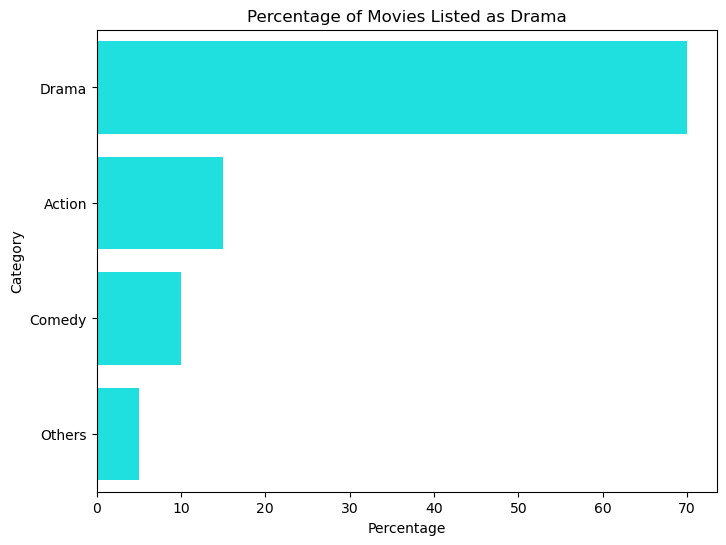

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming percentage_drama_movies is a Pandas Series with movie categories as index and percentages as values

# Create a sample Pandas Series (replace this with your actual data)
data = {'Drama': 70, 'Action': 15, 'Comedy': 10, 'Others': 5}
percentage_drama_movies = pd.Series(data)

# Reset index to prepare for plotting
percentage_drama_movies = percentage_drama_movies.reset_index()

# Rename columns for clarity
percentage_drama_movies.columns = ['Category', 'Percentage']

# Plotting using Seaborn barplot
plt.figure(figsize=(8, 6))
sns.barplot(data=percentage_drama_movies, x='Percentage', y='Category', color='cyan')
plt.xlabel('Percentage')
plt.ylabel('Category')
plt.title('Percentage of Movies Listed as Drama')
plt.show()


In [90]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


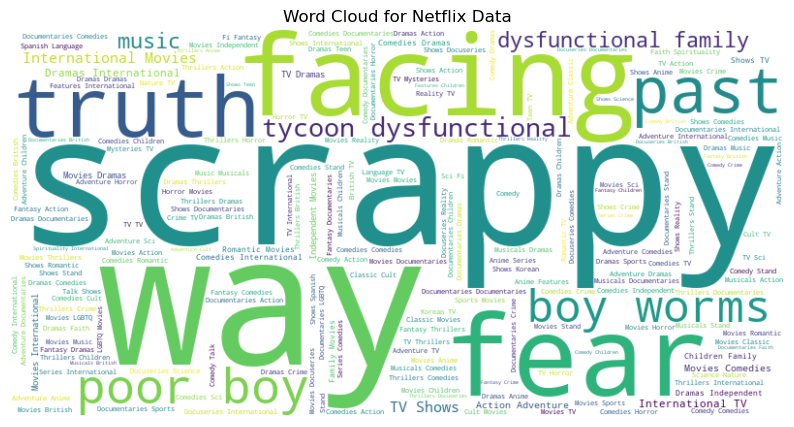

In [91]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming netflix_data is your DataFrame containing Netflix dataset

# Concatenate text data from 'title' and 'description' columns
text_data = ' '.join(netflix_data['listed_in']) + ' '.join(netflix_data['description'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Netflix Data')
plt.show()


In [112]:

from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

netflix_data = pd.read_csv('netflix_titles.csv')

# Combine 'Title' and 'Description' columns into a single text column
netflix_data['Combined'] = netflix_data['listed_in'] + ' ' + netflix_data['Description']

# Function to tokenize text and create frequency distribution
def get_word_freq(text):
    tokens = word_tokenize(text)
    return FreqDist(tokens)

# Apply tokenization and frequency distribution to the combined text
netflix_data['FreqDist'] = netflix_data['Combined'].apply(get_word_freq)

# Display frequency distribution of words in the 'FreqDist' column for the first few rows
for index, row in netflix_data.head().iterrows():
    print(f"Frequency distribution for index {index}:")
    print(row['FreqDist'].tabulate(10))
    print("\n")


KeyError: 'Description'

In [116]:

from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize


# Combine 'Title' and 'Description' columns into a single text column
netflix_data['Combined'] = netflix_data['listed_in'] + ' ' + netflix_data['description']

# Function to tokenize text and create frequency distribution
def get_word_freq(text):
    tokens = word_tokenize(text)
    return FreqDist(tokens)

# Apply tokenization and frequency distribution to the combined text
netflix_data['FreqDist'] = netflix_data['Combined'].apply(get_word_freq)

# Display frequency distribution of words in the 'FreqDist' column for the first few rows
for index, row in netflix_data.head().iterrows():
    print(f"Frequency distribution for index {index}:")
    print(row['FreqDist'].tabulate(10))
    print("\n")


Frequency distribution for index 0:
          the           his Documentaries            As           her        father         nears           end            of          life 
            2             2             1             1             1             1             1             1             1             1 
None


Frequency distribution for index 1:
           TV             ,             a            at International         Shows        Dramas     Mysteries         After      crossing 
            3             3             3             2             1             1             1             1             1             1 
None


Frequency distribution for index 2:
           TV             ,         Shows           his             a           and         Crime International        Action             & 
            3             3             2             2             2             2             1             1             1             1 
None


Frequency distribution fo

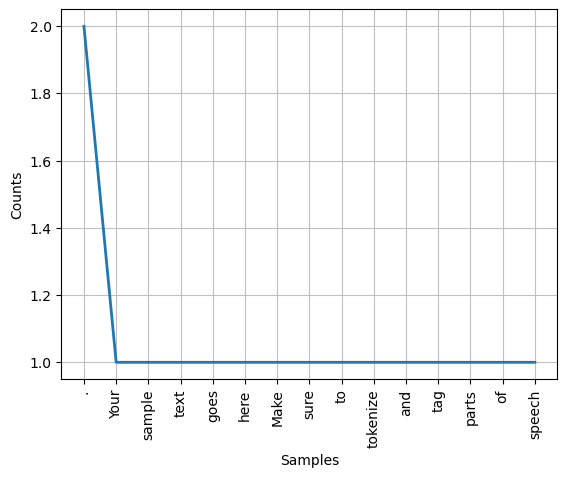

<Axes: xlabel='Samples', ylabel='Counts'>

In [126]:

freq_dist.plot(20)  # Set cumulative=False to plot non-cumulative frequency
